In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

In [41]:
ugrad = np.loadtxt('hw4-ugrad.dat', unpack = True)
chair = np.loadtxt('hw4-chair.dat', unpack = True)
coke = np.loadtxt("hw4-coke.dat", unpack = True)
unknown = np.loadtxt("hw4-unknown.dat", unpack = True)
n_ugrad = len(ugrad)
n_chair = len(chair)
n_coke = len(coke)
n_unknown = len(unknown)

-2.893530685999996 3.142711789810604


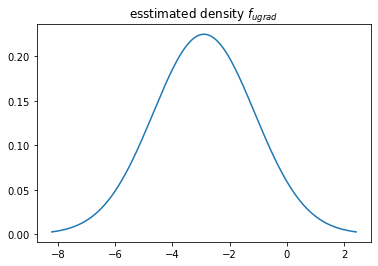

In [47]:
# 1 (a)
# mean and standard deviation of ugrad
mean_ugrad = sum(ugrad)/len(ugrad)
var_ugrad = 0
for i in ugrad:
    var_ugrad = var_ugrad + (i-mean_ugrad)**2
var_ugrad = var_ugrad/len(ugrad)
sd_ugrad = math.sqrt(var_ugrad)
print(mean_ugrad, var_ugrad)

# plot
plot_xa = np.linspace(mean_ugrad - sd_ugrad * 3, mean_ugrad + sd_ugrad * 3, 1000)
plt.plot(plot_xa, stats.norm.pdf(plot_xa, mean_ugrad, sd_ugrad))
plt.title("esstimated density $f_{ugrad}$")
plt.savefig("f_ugrad")

In [49]:
# 1 (b)
a = 1
b = 0
tolerance = 0.0001
step_size = 0.0001
dl_da = 100
dl_db = 100
log_likelihood = []

e = 3

while np.abs(e) > tolerance:
    a_temp = 0
    b_temp = 0
    for xi in chair:
        a_temp += xi * ((1 - np.exp(-a*xi-b))/(1 + np.exp(-a*xi-b)))
        b_temp += (1 - np.exp(-a*xi-b))/(1 + np.exp(-a*xi-b))
    dl_da = n_chair/a - a_temp
    dl_db = - b_temp
    a = a + step_size*dl_da
    b = b + step_size*dl_db
    la = 0
    lb = 0
    for xi in chair:
        la += xi
        lb += np.log(1 + np.exp(-a*xi-b))
    l = n_chair*np.log(a) - a*la - n_chair*b - 2*lb
    log_likelihood.append(l)
    if len(log_likelihood) >= 2:
        e = log_likelihood[len(log_likelihood)-1]/log_likelihood[len(log_likelihood)-2] - 1
print(a, b)

2.08380759580565 -10.337514280116958


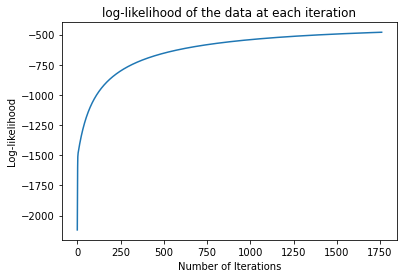

In [46]:
# 1 (b)
# The plot of the log-likelihood of the data 
plot_xb1 = np.linspace(0, len(log_likelihood), len(log_likelihood))
plt.plot(plot_xb1, log_likelihood)
plt.title("log-likelihood of the data at each iteration")
plt.xlabel("Number of Iterations")
plt.ylabel("Log-likelihood")
plt.show()

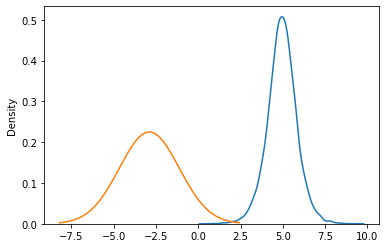

In [45]:
# 1 (b)
import seaborn as sb
sb.kdeplot(np.random.logistic(-b/a, 1/a, 10000))
plt.plot(plot_xa, stats.norm.pdf(plot_xa, mean_ugrad, sd_ugrad))

In [50]:
# 1 (c)
plot_xc = np.linspace(-10, 10, 1000)
plot_yc = []
h = 0.5

for x in plot_xc:
    temp = 0
    for xi in coke:
        temp = temp + (1/math.sqrt(2*np.pi))*np.exp(-((x-xi)/h)**2/2)
    y = (1/(len(coke)*h))*temp
    plot_yc.append(y)

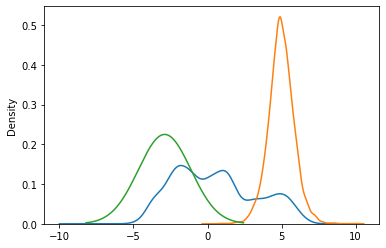

In [51]:
plt.plot(plot_xc, plot_yc)
sb.kdeplot(np.random.logistic(-b/a, 1/a, 10000))
plt.plot(plot_xa, stats.norm.pdf(plot_xa, mean_ugrad, sd_ugrad))
# sb.kdeplot()

In [53]:
# 1 (d)
log_norm = 0
log_logistics = 0
log_lo1 = 0
log_lo2 = 0
log_kde = 0
log_temp = 0
for xi in unknown:
    log_norm = log_norm + (-1/2)*np.log(sd_ugrad**2) + (-1/2)*np.log(2*np.pi) - (xi - mean_ugrad)**2/(2*sd_ugrad**2)
    log_lo1 = log_lo1 + xi
    log_lo2 = log_lo2 + np.log(1 + np.exp(-a*xi-b))
    kde_temp = 0
    for i in coke:
#         kde_temp = kde_temp + (1/math.sqrt(2*np.pi))*np.exp((-((xi-i)/h)**2)/2)
        kde_temp = kde_temp + (1/math.sqrt(2*np.pi))*np.exp((-((xi-i)/h)**2)/2)
    log_temp = (1.0/(n_coke*h)) * kde_temp
    log_kde = log_kde + np.log(log_temp)
log_logistics = n_unknown * np.log(a) - a*log_lo1 - n_unknown*b - 2*log_lo2
print(log_logistics)
print(log_norm)
print(log_kde)

-5151.290450105144
-665.2023398471927
-1151.797558584534


In [15]:
print(a,b)

3.022984776896946 -15.145426554528276


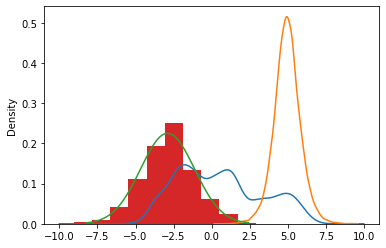

In [54]:
plt.plot(plot_xc, plot_yc)
sb.kdeplot(np.random.logistic(-b/a, 1/a, 10000))
plt.plot(plot_xa, stats.norm.pdf(plot_xa, mean_ugrad, sd_ugrad))
plot_gridx = np.linspace(min(unknown), max(unknown), 10)
plot_gridy = np.zeros(len(plot_gridx))
plt.hist(unknown, density = True)
plt.show()

In [36]:
print(plot_gridx)

[-9.066796   -7.73592244 -6.40504889 -5.07417533 -3.74330178 -2.41242822
 -1.08155467  0.24931889  1.58019244  2.911066  ]
